In [1]:
import pandas as pd, matplotlib as mpl
import os

In [2]:
# Dependency checks
import sys
print("Python version: "+sys.version[:5]) # 3.6.0
print("Pandas version: "+pd.__version__) # 0.23.4
print("Matplotlib version: "+mpl.__version__) # 2.1.1

Python version: 3.6.0
Pandas version: 0.23.4
Matplotlib version: 2.1.1


In [3]:
for i in range(1,3)
# Set batch number for file naming
batch_n = "2"


## Trimming columns from raw data

In [6]:
# Read in pilot data file 
fname = "raw_data/Batch"+batch_n+"/qual.csv"
df = pd.read_csv(fname,sep=",")[2:] # This index trims the first two rows

In [48]:
# I manuallly trimmed some columns
# cols = str(df.columns.values.tolist())
# f = open("filtered_columns.txt", "w")
# f.write(cols)
# f.close()

In [29]:
# import ast
# file = open("filtered_columns.txt","r")
# cols = ast.literal_eval(file.read())
# file.close()

In [30]:
# Should be different by 270 columns (-27 (9 platforms x 3 questions) columns * 10 platforms )
# len(df.columns) - len(df[cols].columns)

270

In [31]:
# Save sample.csv which has trimmed columns
# df[cols][2:].to_csv("raw_data/Batch"+batch_n+"/sample.csv",index=False) ## Remove the top two rows

In [32]:
# df = df[cols][2:]

## Create a table for our class paper hypotheses (INSC571)

In [33]:
# Make a new df to hold the first table
# Table columns will be [subject, fb_use,fb_fight,ig_use,ig_fight]
df_final = pd.DataFrame([],columns=["subject","fb_use","fb_fight","ig_use","ig_fight","pol","edu"])
df_final.subject = [x for x in df.reward_code] # Set subject number to reward code for now

In [229]:
# Find if a string paramater (platform) was used by a participant
def evaluate_used_platforms(_df, platform):
    # Create a list of lists of individual platforms
    platforms = _df.Platform_Use.str.split(",")
    
    # Return a list of binaries (True if platform found, else False)
    return [1 if platform in x else 0 for x in platforms ]

In [35]:
# Set use columns
df_final.fb_use = evaluate_used_platforms(df,"Facebook")
df_final.ig_use = evaluate_used_platforms(df,"Instagram")

In [230]:
# Find if a string paramater (platform) was used to fight by a participant
def evaluate_fighting_platforms(_df, platform):
    # Create a list of lists of individual platforms
    platforms = _df.Platform_Fights.str.split(",")
    # Return a list of binaries (True if platform found, else False)
    return [1 if platform in x else 0 for x in platforms ]

In [37]:
# Set fighting columns
df_final.fb_fight = evaluate_fighting_platforms(df,"Facebook")
df_final.ig_fight = evaluate_fighting_platforms(df,"Instagram")

In [38]:
# Find political leaning
def evaluate_political_leaning(_df):
    # Create a dictionary to hold the scale values
    d = {
        "Extremely liberal":1,
        "Very liberal":2,
        "Somewhat liberal":3,
        "Moderate":4,
        "Somewhat conservative":5,
        "Very conservative":6,
        "Extremely conservative":7,
    }
    return _df.political_leaning.replace(d).values # Use values property to ignore indexing problems

In [39]:
df_final.pol = evaluate_political_leaning(df)

In [40]:
# Find education level
def evaluate_eduation_level(_df):
    d = {
        "Some high school":1,
        "High school degree or equivalent (e.g. GED)":2,
        "Some college":3,
        "Associate degree (e.g. AA, AS)":4,
        "Bachelor's degree (e.g. BA, BS)":5,
        "Master's degree (e.g. MA, MS, MEd)":6,
        "Professional degree (e.g. MD, DDS, DVM)":7,
        "Doctorate (e.g. PhD, EdD)":8,
    }
    return _df.education.replace(d).values 

In [41]:
df_final.edu = evaluate_eduation_level(df)

In [42]:
df_final = df_final.astype("int64",errors="ignore") # Change binary to numeric, ignore values that can't be changed to int (NA, eduation)

In [43]:
df_final.subject = df_final.index + 1 # Change from reward_code to number
df_final = df_final.set_index(df_final.subject).iloc[:,1:]

In [44]:
df_final

,fb_use,fb_fight,ig_use,ig_fight,pol,edu
subject,,,,,,
1,1,1,0,0,4,5
2,1,1,1,0,3,5
3,1,1,1,0,2,3
4,1,0,1,0,5,2
5,1,1,0,0,1,2
6,1,1,1,0,6,5
7,1,1,1,0,3,3
8,1,1,0,0,1,5
9,1,1,1,0,3,5


In [45]:
# Print CSV of first table
fpath = "transformed_data/pilot_platform_use"+batch_n+".csv"
df_final.to_csv(fpath,sep=",")

# Aggregating tables

In [96]:
# Go through each batch folder, grab the qual.csv data, append to master data frame

In [190]:
# Create a master dataframe to hold all the batches
df_master = pd.DataFrame([])

# Grab and merge the sample csvs
for i in range(1,3):
    batch = str(i)
    df_n = pd.read_csv("raw_data/Batch"+batch+"/sample.csv")
    df_master = pd.concat([df_master,df_n])
    print(len(df_master))

10
19


In [213]:
df = df_master.loc[:,"Platform_Use":] # Drop the qualtrics identifying data

In [214]:
# Print for Alexis
df["Duration"] = df_master["Duration (in seconds)"]
# df.to_csv("edited_survey_data.csv",sep=",",index=False)

## Find usage and fights for all platforms

In [215]:
# Graph platform use
# df_final = df[["Platform_Use","Platform_Fights"]]

In [231]:
df_final = pd.DataFrame([])
# df_final.index.name = "subject"
# df_final.index = range(len(df.index)) # Set subject number to reward code for now

In [ ]:
# Set column name - platform mapping
pref = [["fb_", "Facebook"],
        ["ig_", "Instagram"],
        ["fbm_", "Facebook Messenger"],
        ["wa_", "WhatsApp"],
        ["wc_","WeChat"],
        ["tblr_", "Tumblr"],
        ["red_", "Reddit"],
        ["sc_", "Snapchat"],
        ["yt_", "Youtube"],
        ["twt_", "Twitter"],]

In [276]:
platforms = [x[1] for x in pref]

['Facebook',
 'Instagram',
 'Facebook Messenger',
 'WhatsApp',
 'WeChat',
 'Tumblr',
 'Reddit',
 'Snapchat',
 'Youtube',
 'Twitter']

In [232]:
suf = "_use"
for item in pref:
    df_final[item[0]+suf] = evaluate_used_platforms(df_master,item[1])

In [233]:
suf = "_fight"

for item in pref:
    df_final[item[0]+suf] = evaluate_fighting_platforms(df_master,item[1])

In [235]:
# df_final.set_index(df_final.subject,inplace=True)
df_final.index.name="subject"
df_final.index = df_final.index + 1

In [238]:
df_final["edu"] = evaluate_eduation_level(df_master)
df_final["pol"] = evaluate_political_leaning(df_master)

In [199]:
(df.Duration/60).describe()

count    19.000000
mean      8.535088
std       5.090659
min       1.816667
25%       6.091667
50%       8.133333
75%       9.975000
max      23.933333
Name: Duration, dtype: float64

In [278]:
df_final.to_csv("master_table.csv",sep=",",index=False)

In [29]:
test = pd.read_csv("edited_survey_data.csv",sep=",")
test[test.Duration > 600].Duration

1      986
4      601
9     1436
11     629
12     650
Name: Duration, dtype: int64

## Visualizations

In [260]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# What are fight / use rates like

In [243]:
use_cols = df_final.columns[df_final.columns.str.contains("use")]
fight_cols = df_final.columns[df_final.columns.str.contains("fight")]

In [244]:
df_final[use_cols].sum()

fb__use      18
ig__use      11
fbm__use     10
wa__use       2
wc__use       0
tblr__use     0
red__use     13
sc__use       4
yt__use      14
twt__use     14
dtype: int64

In [254]:
len(df_final)

19

In [270]:
use

fb__use      18
ig__use      11
fbm__use     10
wa__use       2
wc__use       0
tblr__use     0
red__use     13
sc__use       4
yt__use      14
twt__use     14
dtype: int64

In [268]:
fights

fb__fight      15
ig__fight       0
fbm__fight      4
wa__fight       1
wc__fight       0
tblr__fight     0
red__fight      5
sc__fight       1
yt__fight       1
twt__fight      2
dtype: int64

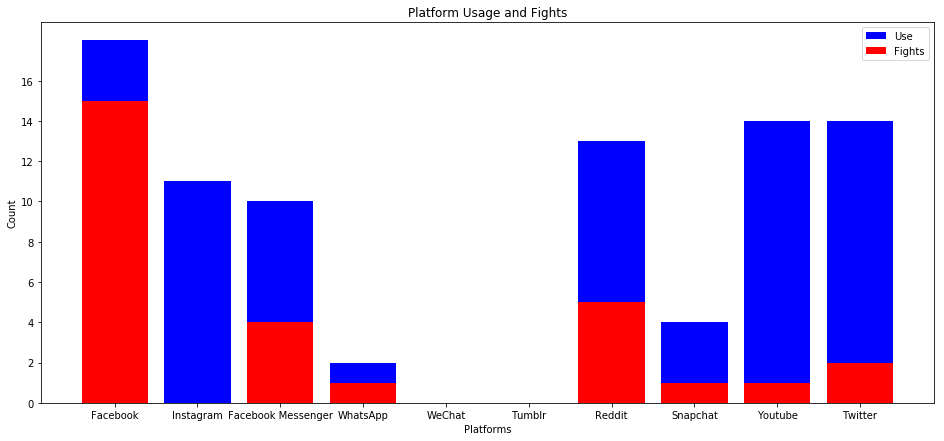

In [287]:
fig = plt.figure(num=None, figsize=(16,7))

use = df_final[use_cols].sum()
fights = df_final[fight_cols].sum()

N = 10 #number of platforms
ind = np.arange(N)

p1 = plt.bar(ind, use.values, color="blue")
p2 = plt.bar(ind, fights.values, color="red")

plt.ylabel("Count")
plt.title("Platform Usage and Fights")
plt.xlabel("Platforms")
plt.xticks(ind, platforms)
plt.yticks(np.arange(0,18,step=2))
plt.legend(["Use","Fights"])

plt.show()

fig.savefig("platform_use.png")